Oakland School Demand

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.linalg import lstsq # for the multiple linear regression, we'll use the scipy linear algebra least-squares function
from scipy.interpolate import interp1d # for quantile regression, we'll want this 1d interpolation function
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pip install xlrd==1.2.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
demand = pd.read_excel('HS_Enrollment.xlsx')

demand

,School,2016,2017,2018,2019,2020
0,Castlemont High Demand,0.502,0.433,0.685,0.397,0.673
1,Coliseum College Prep A,2.308,2.229,1.813,1.570,1.361
2,Fremont High Demand,0.363,0.229,0.492,0.504,0.708
3,International Community,0.900,0.712,1.159,1.057,1.271
4,LIFE Academy Demand,2.422,2.167,2.387,1.917,1.896
5,Madison Park Academy TK,0.411,0.148,0.300,0.283,0.446
6,Manzanita Community,0.365,0.264,0.333,0.338,0.427
7,McClymonds High Demand,0.238,0.184,0.229,0.452,0.362
8,MetWest High Demand,5.400,3.476,4.700,1.964,2.160
9,Oakland High Demand,0.510,0.673,0.837,0.806,0.853


<AxesSubplot:>

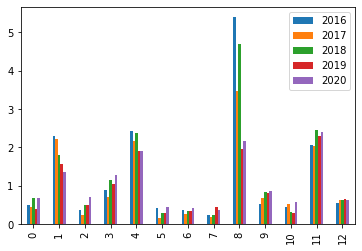

In [5]:
demand.plot.bar()

In [6]:
CKHS= pd.read_excel('CHKS_STUDYAREA.xlsx')

CKHS

,Question_ID,Year,School,Response,Percent_Total,Respondents,Demand
0,142,2015,Castlemont High School,4,0.309524,13,0.502
1,142,2015,Castlemont High School,3,0.428571,18,0.502
2,142,2015,Castlemont High School,2,0.190476,8,0.502
3,142,2015,Castlemont High School,1,0.023810,1,0.502
4,142,2015,Castlemont High School,0,0.047619,2,0.502
...,...,...,...,...,...,...,...
355,12,2019,Oakland Technical High School,3,0.385217,443,2.402
356,12,2019,Oakland Technical High School,2,0.276522,318,2.402
357,12,2019,Oakland Technical High School,1,0.078261,90,2.402
358,12,2019,Oakland Technical High School,0,0.073043,84,2.402


In [7]:
xd=CKHS.iloc[2:91]['Year']
yd=CKHS.iloc[2:91]['Demand']

In [8]:
castlemont=CKHS.iloc[2:91]

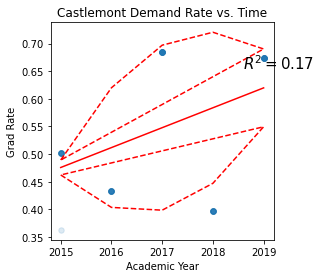

In [9]:
fig, ax = plt.subplots(figsize=(4,4))

plt.scatter(xd, yd, s=30, alpha=0.15, marker='o')

par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=15)



ax.set_title('Castlemont Demand Rate vs. Time')
ax.set_xlabel('Academic Year')
ax.set_ylabel('Grad Rate');

# error bounds
yerr = [abs(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)]
par = np.polyfit(xd, yerr, 2, full=True)

yerrUpper = [(xx*slope+intercept)+(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]
yerrLower = [(xx*slope+intercept)-(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]

plt.plot(xl, yl, '-r')
plt.plot(xd, yerrLower, '--r')
plt.plot(xd, yerrUpper, '--r')
plt.show()


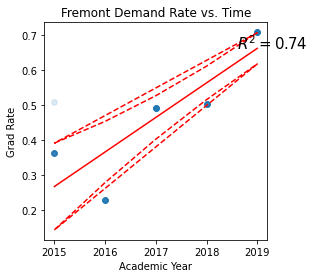

In [10]:
xd=CKHS.iloc[92:181]['Year']
yd=CKHS.iloc[92:181]['Demand']

fig, ax = plt.subplots(figsize=(4,4))

plt.scatter(xd, yd, s=30, alpha=0.15, marker='o')

par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=15)



ax.set_title('Fremont Demand Rate vs. Time')
ax.set_xlabel('Academic Year')
ax.set_ylabel('Grad Rate');

# error bounds
yerr = [abs(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)]
par = np.polyfit(xd, yerr, 2, full=True)

yerrUpper = [(xx*slope+intercept)+(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]
yerrLower = [(xx*slope+intercept)-(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]

plt.plot(xl, yl, '-r')
plt.plot(xd, yerrLower, '--r')
plt.plot(xd, yerrUpper, '--r')
plt.show()


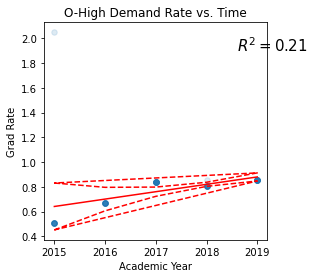

In [11]:
xd=CKHS.iloc[182:271]['Year']
yd=CKHS.iloc[182:271]['Demand']

fig, ax = plt.subplots(figsize=(4,4))

plt.scatter(xd, yd, s=30, alpha=0.15, marker='o')

par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=15)



ax.set_title('O-High Demand Rate vs. Time')
ax.set_xlabel('Academic Year')
ax.set_ylabel('Grad Rate');

# error bounds
yerr = [abs(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)]
par = np.polyfit(xd, yerr, 2, full=True)

yerrUpper = [(xx*slope+intercept)+(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]
yerrLower = [(xx*slope+intercept)-(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]

plt.plot(xl, yl, '-r')
plt.plot(xd, yerrLower, '--r')
plt.plot(xd, yerrUpper, '--r')
plt.show()


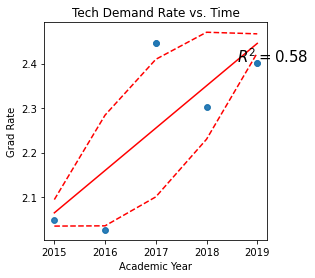

In [12]:
xd=CKHS.iloc[272:361]['Year']
yd=CKHS.iloc[272:361]['Demand']

fig, ax = plt.subplots(figsize=(4,4))

plt.scatter(xd, yd, s=30, alpha=0.15, marker='o')

par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=15)



ax.set_title('Tech Demand Rate vs. Time')
ax.set_xlabel('Academic Year')
ax.set_ylabel('Grad Rate');

# error bounds
yerr = [abs(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)]
par = np.polyfit(xd, yerr, 2, full=True)

yerrUpper = [(xx*slope+intercept)+(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]
yerrLower = [(xx*slope+intercept)-(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]

plt.plot(xl, yl, '-r')
plt.plot(xd, yerrLower, '--r')
plt.plot(xd, yerrUpper, '--r')
plt.show()


In [13]:
xd=CKHS.iloc[2:361]['Year']
yd=CKHS.iloc[2:361]['Demand']

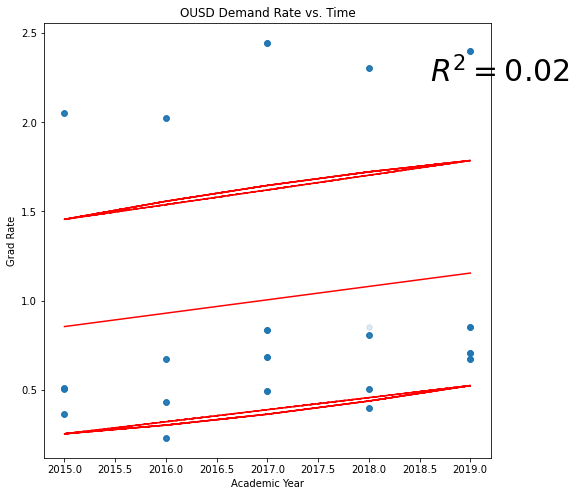

In [14]:

fig, ax = plt.subplots(figsize=(8,8))

plt.scatter(xd, yd, s=30, alpha=0.15, marker='o')

par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=30)



ax.set_title('OUSD Demand Rate vs. Time')
ax.set_xlabel('Academic Year')
ax.set_ylabel('Grad Rate');

# error bounds
yerr = [abs(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)]
par = np.polyfit(xd, yerr, 2, full=True)

yerrUpper = [(xx*slope+intercept)+(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]
yerrLower = [(xx*slope+intercept)-(par[0][0]*xx**2 + par[0][1]*xx + par[0][2]) for xx,yy in zip(xd,yd)]

plt.plot(xl, yl, '-r')
plt.plot(xd, yerrLower, '--r')
plt.plot(xd, yerrUpper, '--r')
plt.show()
